In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Win10\Desktop\review SYS\reviews_data_dump\reviews_badminton\data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [4]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


### Treating NULL Values

In [5]:
df.drop('Month',axis=1,inplace=True)

In [6]:
df['Place'] = df['Place of Review'].apply(lambda x : str(x).replace('Certified Buyer, ',''))

In [7]:
df.drop('Place of Review',axis=1,inplace=True)

In [8]:
df.head()

,Reviewer Name,Review Title,Up Votes,Down Votes,Review text,Ratings,Place
0,Kamal Suresh,Nice product,889.0,64.0,"Nice product, good quality, but price is now r...",4,Chirakkal
1,Flipkart Customer,Don't waste your money,109.0,6.0,They didn't supplied Yonex Mavis 350. Outside ...,1,Hyderabad
2,A. S. Raja Srinivasan,Did not meet expectations,42.0,3.0,Worst product. Damaged shuttlecocks packed in ...,1,Dharmapuri
3,Suresh Narayanasamy,Fair,25.0,1.0,"Quite O. K. , but nowadays the quality of the...",3,Chennai
4,ASHIK P A,Over priced,147.0,24.0,Over pricedJust â?¹620 ..from retailer.I didn'...,1,nan


### Performing EDA

<Axes: xlabel='Ratings', ylabel='Count'>

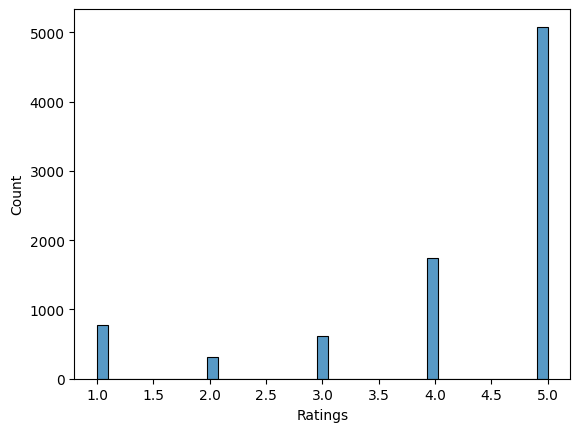

In [9]:
sns.histplot(df['Ratings'])

In [10]:
df['Place'] = df['Place'].astype('category')

In [11]:
pd.crosstab(df['Place'], df['Ratings']).head()

Ratings,1,2,3,4,5
Place,,,,,
Abohar,0,0,0,0,3
Abu Road,0,0,0,1,0
Adalaj,0,0,0,0,1
Adampur,0,0,0,0,1
Adichanalloor,0,0,0,0,1


<Axes: xlabel='Up Votes', ylabel='Ratings'>

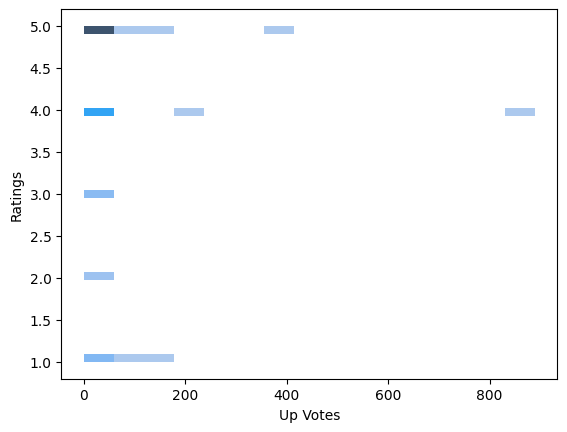

In [12]:
sns.histplot(x=df['Up Votes'],y=df['Ratings'])

In [13]:
df.drop(['Reviewer Name','Review Title','Up Votes','Down Votes','Place'],axis=1,inplace=True)

In [14]:
df.head()

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [15]:
df = df.dropna()

In [16]:
from sklearn.model_selection import train_test_split
x = df[['Review text']]
y = df['Ratings']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Text Preprocessing

In [18]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [19]:
stemmer = PorterStemmer()

In [20]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Win10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    # change sentence to lower case
    sentence = sentence.lower()
    # tokenize into words
    tokens = sentence.split()
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens)])

In [22]:
x_train_processed = x_train['Review text'].apply(lambda x: preprocess(x, 'stem'))

In [23]:
x_train_processed.rename(columns={0:'Review'},inplace=True)

In [24]:
x_train_processed

,Review
6233,varri good productread
7331,nice read
6650,qualiti good read
6696,goodread
3765,goodread
...,...
6702,best shuttleread
14,realli satisfi qualiti prompt deliveri happi c...
5503,pack product done properli mark request team t...
195,wow productread


### BOW

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

x_train_bow = vocab.fit_transform(x_train_processed['Review'])

In [26]:
x_train_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### td-idf

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(x_train_processed['Review'])

In [29]:
result.toarray().shape

(6808, 2366)

### Word2Vec

In [30]:
import gensim
from gensim.models import Word2Vec

In [31]:
x_train_processed['splitReview'] = x_train_processed['Review'].apply(lambda x: x.split())

In [32]:
model = Word2Vec(list(x_train_processed['splitReview']), vector_size=50, min_count=1)

In [33]:
def Generate_representation(doc, keyed_vectors):
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [34]:
x_train_processed['vector'] = x_train_processed['splitReview'].apply(lambda x : Generate_representation(x, model.wv))

### Preprocessing test data

In [35]:
x_test_processed = x_test['Review text'].apply(lambda x: preprocess(x, 'stem'))

In [36]:
x_test_processed.rename(columns={0:'Review'},inplace=True)

In [37]:
x_test_processed['splitReview'] = x_test_processed['Review'].apply(lambda x: x.split())

In [38]:
model = Word2Vec(list(x_test_processed['splitReview']), vector_size=50, min_count=1)

In [39]:
x_test_processed['vector'] = x_test_processed['splitReview'].apply(lambda x : Generate_representation(x, model.wv))

In [40]:
x_test_processed

,Review,splitReview,vector
315,good productread,"[good, productread]","[0.0149273155, -0.020110702, 0.00013170287, 0...."
8004,nice shuttl gud packingread,"[nice, shuttl, gud, packingread]","[0.030002264, -0.034158885, -0.010925677, -0.0..."
5344,nice oneread,"[nice, oneread]","[0.008897369, -0.014731172, -0.0018600784, 0.0..."
80,good shuttl classic productread,"[good, shuttl, classic, productread]","[0.033519488, -0.03567837, -0.003997, 0.011720..."
3961,bestread,[bestread],"[-0.006209639, 0.013045871, 0.014257367, 0.019..."
...,...,...,...
6326,good oneread,"[good, oneread]","[0.014584333, -0.028682627, 0.010833287, 0.023..."
4421,nice qualityread,"[nice, qualityread]","[0.0052371854, -0.009530193, -0.012492649, -0...."
1001,badread,[badread],"[0.014671687, 0.01000012, -0.020158498, 0.0066..."
8070,product pretti good reason price read,"[product, pretti, good, reason, price, read]","[0.020915568, -0.03002757, -0.010603403, 0.018..."


### Building Model

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier()
classifier.fit(list(x_train_processed['vector']), y_train)

y_test_pred = classifier.predict(list(x_test_processed['vector']))

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))       


0.5957696827262045
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       161
           2       0.00      0.00      0.00        74
           3       1.00      0.02      0.03       113
           4       0.00      0.00      0.00       340
           5       0.60      1.00      0.75      1014

    accuracy                           0.60      1702
   macro avg       0.32      0.20      0.16      1702
weighted avg       0.42      0.60      0.45      1702



c:\Users\Win10\Desktop\review SYS\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Win10\Desktop\review SYS\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Win10\Desktop\review SYS\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

### BERT

In [42]:
'''! pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')
! pip install tqdm
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()
x_train_processed['BERT_representation'] = x_train_processed['Review'].progress_apply(model.encode)
x_train_processed.head()'''
# sir I have made this bert model by referring to your github page but apparently my lap does not have my computing power
#It is kind of old lap so I commented the code and I proceed with Wrod2Vec

"! pip install -U sentence-transformers\nfrom sentence_transformers import SentenceTransformer, util\nmodel = SentenceTransformer('all-MiniLM-L6-v2')\n! pip install tqdm\nfrom tqdm import tqdm, tqdm_notebook\ntqdm.pandas()\nx_train_processed['BERT_representation'] = x_train_processed['Review'].progress_apply(model.encode)\nx_train_processed.head()"

In [43]:
import pickle

In [44]:
pickle.dump(classifier,open('model.pkl','wb'))

In [45]:
x_train_processed.head()

,Review,splitReview,vector
6233,varri good productread,"[varri, good, productread]","[-0.06624062, -0.0104542645, -0.0076835714, 0...."
7331,nice read,"[nice, read]","[-0.16519666, -0.0015126574, -0.026537053, 0.1..."
6650,qualiti good read,"[qualiti, good, read]","[-0.18946694, 0.0039730337, -0.012399882, 0.14..."
6696,goodread,[goodread],"[-0.033084363, -0.02093281, -0.0043445434, 0.0..."
3765,goodread,[goodread],"[-0.033084363, -0.02093281, -0.0043445434, 0.0..."


In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import CategoricalCrossentropy

In [62]:
net = Sequential()
net.add(Dense(25,activation='sigmoid'))
net.add(Dense(10,activation='relu'))
net.add(Dense(5,activation='sigmoid'))

In [63]:
net.compile(loss=CategoricalCrossentropy(),metrics=['accuracy'])

In [51]:
x = np.vstack(x_train_processed['vector'].apply(lambda x:x.flatten()))

In [54]:
y = y_train.values

In [58]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

y = y.reshape(-1, 1)
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(y)

In [64]:
y = one_hot_encoded.toarray()

In [65]:
y.shape

(6808, 5)

In [67]:
net.fit(x,y,epochs=30)

Epoch 1/30


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5980 - loss: 1.1466
Epoch 2/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6007 - loss: 1.1310
Epoch 3/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5981 - loss: 1.1383
Epoch 4/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5917 - loss: 1.1491
Epoch 5/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5889 - loss: 1.1557
Epoch 6/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6019 - loss: 1.1344
Epoch 7/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5963 - loss: 1.1385
Epoch 8/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6009 - loss: 1.1316
Epoch 9/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5994 - loss: 1.1363
Epoch 10/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5929 - loss: 1.1611
Epoch 11/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5946 - loss: 1.1432
Epoch 12/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy